<a href="https://colab.research.google.com/github/beriaacan/Predict-Bike-Demand/blob/main/Predict_Bike_Demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Predict Bike Demand </h1>
RideIt is a Washington, D.C based bike-sharing service (application) that allows users to rent a bike from one place and leave it somewhere else. Bike sharing is a process that is highly correlated to seasonal and environmental factors like the day of the week, weather conditions, season, etc. The company is interested in building a system that will help them predict the hourly rental count in order to effectively manage demand and supply.

There is historical data collected through the app. The data consists of seasonal and weather information, among other features, on an hourly basis.

Using machine learning, build a model to predict rental count and analyze which factors contribute the most in making this prediction.   

<h3> Files: </h3>

train.csv - data used for training along with target variable

test.csv – data on which predictions are to be made

sample_submission.csv – sample format of submission

<h3> Problem: </h3>

Perform an analysis of the given data to determine how different features are related to the demand.  Build a machine learning model that can predict the demand.



For each record in the test set (test.csv), predict the value of the demand variable. Submit a CSV file with a header row plus each of the test entries, each on its own line.



The file (submissions.csv) should have exactly 2 columns:
- id
- demand

<h3> Deliverables: </h3>

Well commented Jupyter notebook
“submissions.csv”


 Explore the data, make visualizations, and generate new features if required. Make appropriate plots, annotate the notebook with markdowns and explain necessary inferences. A person should be able to read the notebook and understand the steps taken as well as the reasoning behind them. The solution will be graded on the basis of usage of effective visualizations to convey the analysis and the modeling process.


<h3> Evaluation Metric: </h3>

The metric used for evaluating the performance of Mean Absolute Error.

MAE = Mean of absolute of differences between actuals and prediction

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FOLDERNAME ='Predict Bike Demand/'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

In [ ]:
# Data Manipulation Libraries
import numpy as np
import pandas as pd

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_log_error, make_scorer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train= pd.read_csv('drive/MyDrive/Predict Bike Demand/train.csv')
#drive/MyDrive/Predict Bike Demand/train.csv
test= pd.read_csv('drive/MyDrive/Predict Bike Demand/test.csv')


In [ ]:
pd.set_option("display.max_columns", 101)

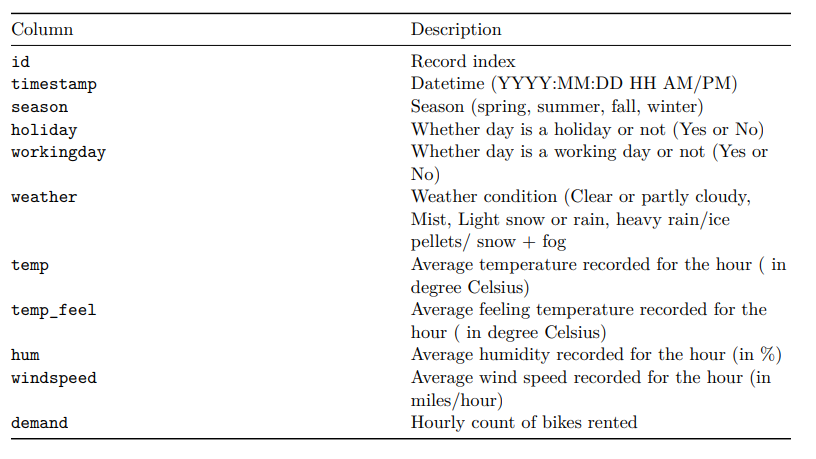


atemp=temp_feel

In [ ]:
# The dataset is already loaded below
data = pd.read_csv("drive/MyDrive/Predict Bike Demand/train.csv")


In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
#Description
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
#Explore columns
data.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'month', 'day_of_week', 'year', 'day'],
      dtype='object')

In [ ]:
data.isnull().sum() #for checking missing values

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  int64         
 2   holiday      10886 non-null  int64         
 3   workingday   10886 non-null  int64         
 4   weather      10886 non-null  int64         
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  count        10886 non-null  int64         
 12  hour         10886 non-null  int64         
 13  month        10886 non-null  int64         
 14  day_of_week  10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory us

In [ ]:
# You can create additional features like 'hour', 'month', 'day of week', etc., from the 'datetime' column.

data['datetime'] = pd.to_datetime(data['datetime'])
data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data['day'] = data['datetime'].dt.day_name()
# data['day_of_week'] = data['datetime'].dt.dayofweek #also shows the day of week (1=sunday etc.)
data['year'] = data['datetime'].dt.year

In [ ]:
# Replace the values in the 'season' column with corresponding strings
data['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)

# Replace the values in the 'holiday' column with corresponding strings
data['holiday'].replace({1: 'Holiday', 0: 'Not Holiday'}, inplace=True)

# Replace the values in the 'workingday' column with corresponding strings
data['workingday'].replace({1: 'Workingday', 0: 'Not Workingday'}, inplace=True)

# Replace the values in the 'weather' column with corresponding strings
data['weather'].replace({1: 'Clear', 2: 'Mist', 3: 'Rain', 4: 'Snow'}, inplace=True)

In [ ]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'month', 'day_of_week', 'year', 'day'],
      dtype='object')

In [89]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day_of_week,year,day
0,2011-01-01 00:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,81,0.0,3,13,16,0,1,5,2011,Saturday
1,2011-01-01 01:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,8,32,40,1,1,5,2011,Saturday
2,2011-01-01 02:00:00,Spring,Not Holiday,Not Workingday,Clear,9.02,13.635,80,0.0,5,27,32,2,1,5,2011,Saturday
3,2011-01-01 03:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,3,10,13,3,1,5,2011,Saturday
4,2011-01-01 04:00:00,Spring,Not Holiday,Not Workingday,Clear,9.84,14.395,75,0.0,0,1,1,4,1,5,2011,Saturday


In [84]:
# Categorical columns. To improve data clarity
categorical_features = data[['season', 'holiday', 'workingday', 'weather',  'hour', 'month',  'year','day']]

for i in categorical_features:
    print(data[i].value_counts())
    print('-' * 50)

Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: season, dtype: int64
--------------------------------------------------
Not Holiday    10575
Holiday          311
Name: holiday, dtype: int64
--------------------------------------------------
Workingday        7412
Not Workingday    3474
Name: workingday, dtype: int64
--------------------------------------------------
Clear    7192
Mist     2834
Rain      859
Snow        1
Name: weather, dtype: int64
--------------------------------------------------
12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: hour, dtype: int64
--------------------------------------------------
5     912
6     912
7     912
8     912
12    912
10    911
11    911
4     909
9     909
2     901
3     901
1     884
Name: month, dtype: int64
----------------

<h1> Data Analysis </h1>

* **Mixed Weather Categories:**
The first observation points out that having a single value for 'snow' in the dataset could potentially impact our analysis negatively. To address this, it was decided to combine 'snow' with the 'rain' category within the same column. This acknowledges that snow and rain have similar effects and makes the analysis more consistent and meaningful.

* **Distinguishing Working Day, Holiday, and Weekend:**
The second observation highlights a discrepancy between the 'holiday' and 'not-workingday' variables. It clarifies that the term 'workingday' refers to days that are neither weekends nor holidays. Additionally, the dataset contains cases where neither 'workingday' nor 'holiday' applies. This underscores the need for a third variable: 'weekend.' This variable summarizes scenarios where neither work nor vacation is active, effectively representing a 'weekend.' This subtle distinction clarifies that 'holiday' specifically refers to public holidays, distinct from 'weekend' holidays.

In [ ]:
# Select features and target variable
#X = data[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'hour', 'month', 'day_of_week']]
#y = data['demand']

KeyError: ignored